In [1]:
# import importlib
# importlib.reload(cluster_util)
# import cluster_util

# Notebook error analysis 

## Refining error types - Evaluate cluster results


In [129]:
# clustered results

import pandas as pd 
import cluster_util, config

df_mlerr_clustered = pd.read_excel(config.path_default.joinpath("df_mlerr_mlbugs_filtered_dedup_clustered.xlsx"))

C:\Users\yirwa29\AppData\Local\anaconda3\envs\chatgpt\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [76]:
df_mlerr_clustered.columns

Index(['fname', 'eid', 'ename', 'evalue', 'traceback', 'ename_mapped',
       'imports', 'lib_alias', 'exp_mllib', 'exp_mllib_extracted',
       'python_version', 'evalue_tokenized', 'hash_evalue_tokenized',
       'cluster_km_transformers', 'cluster_dbscan_transformers',
       'cluster_optics_transformers', 'cluster_km_glove',
       'cluster_dbscan_glove', 'cluster_optics_glove', 'cluster_lda60',
       'cluster_lda75', 'cluster_km_wordemb', 'cluster_dbscan_wordemb',
       'cluster_optics_wordemb', 'cluster_hc_wordemb',
       'cluster_hc_transformers'],
      dtype='object')

# Join back the original dataset (before pregroup/dedup)

In [1]:
import pandas as pd 
import config

df_mlerr_dedup_clustered = pd.read_excel(config.path_default.joinpath("df_mlerr_mlbugs_filtered_dedup_clustered.xlsx"))

df_mlerr_k = pd.read_excel(config.path_kaggle_error_analysis.joinpath('df_mlerr_k_mlbugs_filtered.xlsx'))
df_mlerr_g = pd.read_excel(config.path_github_error_analysis.joinpath('df_mlerr_g_mlbugs_filtered.xlsx'))
df_mlerr = pd.concat([df_mlerr_g, df_mlerr_k], ignore_index=True, sort=False)

path_default=WindowsPath('C:/Users/yirwa29/Downloads/Dataset-Nb')


In [2]:
# handle noise means that all noise(-1) are in their own clusters(-2,-2-noise samples)
def assign_clusterres_to_wholedata(df_dedup_clustered, df_mlerr, key = "cluster_optics_transformers", if_handle_noise = True):
    noise_label = -2
    for index,row in df_dedup_clustered.iterrows():
        if row[key] == -1:
            res_label = noise_label
        else:
            res_label = row[key]
        hv_tmp = df_mlerr.loc[df_mlerr.eid==row.eid, "hash_evalue_tokenized"]
        if len(hv_tmp)>1:
            print("error: more than one hash value found. eid:", row.eid)
        elif len(hv_tmp)==1:
            hv = hv_tmp.iloc[0]
            df_mlerr.loc[df_mlerr.hash_evalue_tokenized==hv,key] = res_label
            noise_label -= 1

In [3]:
key_cluster_res = "cluster_lda60"
assign_clusterres_to_wholedata(df_mlerr_dedup_clustered, df_mlerr, key = key_cluster_res)

In [4]:
df_mlerr_cluster_size = df_mlerr.groupby("cluster_lda60").size().sort_values(ascending=False)
df_mlerr_cluster_size

cluster_lda60
48.0    11318
9.0      4543
24.0     2427
16.0     1769
59.0     1757
29.0     1228
30.0     1192
37.0     1167
20.0      976
38.0      812
43.0      762
8.0       730
42.0      715
17.0      713
23.0      601
3.0       597
11.0      589
19.0      570
55.0      396
50.0      381
39.0      378
26.0      318
34.0      310
4.0       294
47.0      279
56.0      214
53.0      210
22.0      208
28.0      201
52.0      190
31.0      186
45.0      180
40.0      175
13.0      166
12.0      154
21.0      152
25.0      151
33.0      147
51.0      138
2.0       132
7.0       118
49.0      102
5.0       102
54.0       96
36.0       94
58.0       90
27.0       77
14.0       75
18.0       74
6.0        59
1.0        59
15.0       56
10.0       50
44.0       50
57.0       42
0.0        34
41.0       27
35.0       24
32.0       13
46.0        9
dtype: int64

<Axes: xlabel='cluster_lda60'>

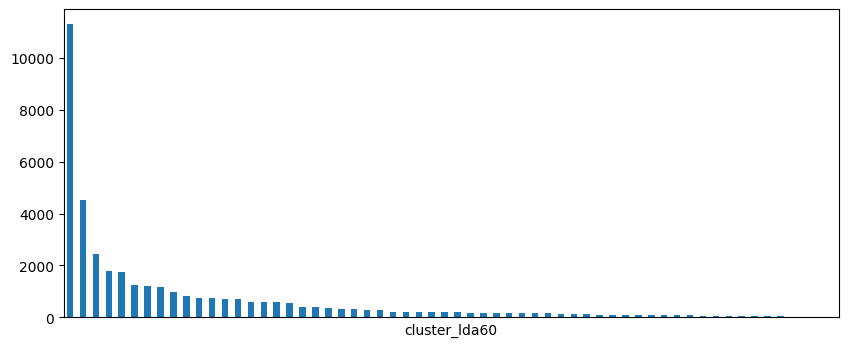

In [5]:
df_mlerr_cluster_size.iloc[:400].plot(kind="bar", xticks=[], figsize=(10,4))

In [6]:
print((df_mlerr_cluster_size.cumsum()/df_mlerr.eid.nunique()).searchsorted(0.7)) # num of clusters needed for cover certain percent of errors

cutoff_cluster_size = 5
print(sum(df_mlerr_cluster_size>=cutoff_cluster_size)) # num of clusters needed for cluster size over ceratin number
print(sum(df_mlerr_cluster_size[df_mlerr_cluster_size>=cutoff_cluster_size])/df_mlerr.eid.nunique()) # percentage

9
60
1.0
